# Milestone 2
---

## Visulaizing the time series :-
---

This visualization helps decide the next steps in time series modeling, such as detecting stationarity, modeling seasonality, or identifying appropriate forecasting methods. If you're ready, we can perform stationarity checks or decompose the series into trend, seasonality, and residuals

In [10]:
import pandas as pd

# Load the Excel file to inspect the data
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'
data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
data.sheet_names
# Load the data from the first sheet
df = data.parse('Sheet1')

# Display the first few rows to understand its structure
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Day Index       207 non-null    datetime64[ns]
 1   Quantity        207 non-null    int64         
 2   Google Clicks   207 non-null    int64         
 3   FB Impressions  207 non-null    int64         
 4   Weekend         207 non-null    int64         
 5   Monday          207 non-null    int64         
 6   Tuesday         207 non-null    int64         
 7   Wednesday       207 non-null    int64         
 8   Thursday        207 non-null    int64         
 9   Friday          207 non-null    int64         
 10  Saturday        207 non-null    int64         
 11  Sunday          207 non-null    int64         
 12  January         207 non-null    int64         
 13  February        207 non-null    int64         
 14  March           207 non-null    int64         
 15  April 

(   Day Index  Quantity  Google Clicks  FB Impressions  Weekend  Monday  \
 0 2021-12-01        14            445             620        0       0   
 1 2021-12-02        10            433             890        0       0   
 2 2021-12-03        13            424             851        0       0   
 3 2021-12-04        22            427             881        1       0   
 4 2021-12-06        12            429             995        0       1   
 
    Tuesday  Wednesday  Thursday  Friday  ...  March  April  May  June  July  \
 0        0          1         0       0  ...      0      0    0     0     0   
 1        0          0         1       0  ...      0      0    0     0     0   
 2        0          0         0       1  ...      0      0    0     0     0   
 3        0          0         0       0  ...      0      0    0     0     0   
 4        0          0         0       0  ...      0      0    0     0     0   
 
    August  September  October  November  December  
 0       0   

## Visualize the data in plots :-

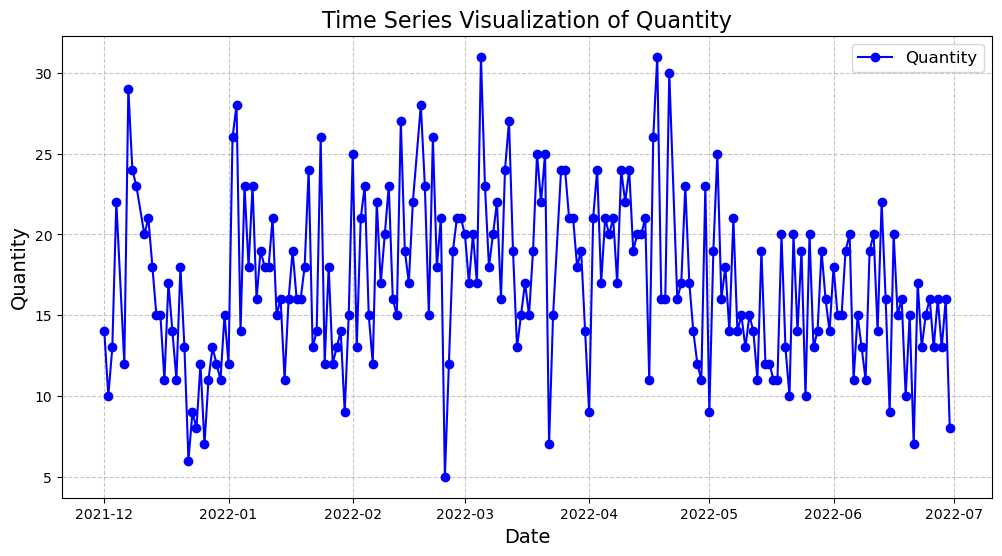

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'
data = pd.ExcelFile(file_path)

# Load the first sheet into a DataFrame
df = data.parse('Sheet1')

# Ensure the Day Index column is in datetime format
df['Day Index'] = pd.to_datetime(df['Day Index'])

# Plot the Quantity column over time
plt.figure(figsize=(12, 6))
plt.plot(df['Day Index'], df['Quantity'], marker='o', linestyle='-', color='blue', label='Quantity')
plt.title('Time Series Visualization of Quantity', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()


## Stationary check :-
---
1. Define Stationarity:
                    A stationary time series has constant mean and variance over time.
The ADF test checks for the presence of unit roots (indicating non-stationarity).


2. Perform the ADF Test:
                    Null Hypothesis (H0): The series has a unit root (non-stationary).
                    Alternative Hypothesis (Ha): The series does not have a unit root (stationary).


   
3. Interpret the Results:
                    If the p-value < 0.05, reject H0 ,meaning the series is stationary.


   
4. Transformations (if needed):
                   If the series is non-stationary, apply transformations like differencing or logarithms.


In [19]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load the Excel file
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'
data = pd.ExcelFile(file_path)
# Load the first sheet
df = data.parse('Sheet1')
# Ensure Day Index is in datetime format and set it as index
df['Day Index'] = pd.to_datetime(df['Day Index'])
df.set_index('Day Index', inplace=True)
# Extract the Quantity column
quantity = df['Quantity']
# Perform Augmented Dickey-Fuller test
adf_result = adfuller(quantity)
# Print results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])
# Interpretation
if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")


ADF Statistic: -4.516446455668563
p-value: 0.0001836136060535287
Critical Values: {'1%': -3.462980134086401, '5%': -2.875885461947131, '10%': -2.5744164898444515}
The time series is stationary.


## Differencing

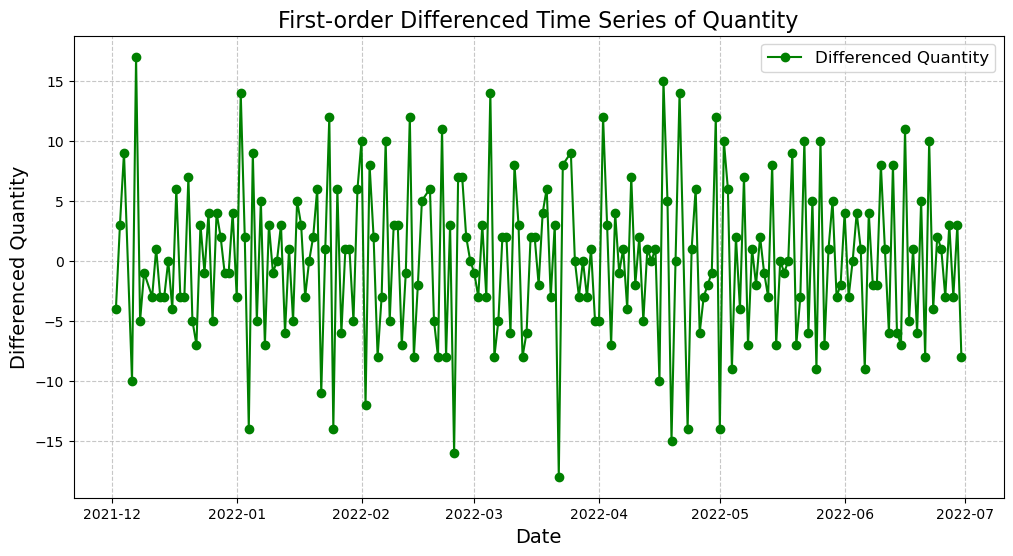

,Quantity_diff
Day Index,
2021-12-02,-4.0
2021-12-03,3.0
2021-12-04,9.0
2021-12-06,-10.0
2021-12-07,17.0


In [24]:
df['Quantity_diff'] = df['Quantity'].diff()

# Drop the first row with NaN after differencing
df_diff = df.dropna(subset=['Quantity_diff'])

# Visualize the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df_diff.index, df_diff['Quantity_diff'], marker='o', linestyle='-', color='green', label='Differenced Quantity')
plt.title('First-order Differenced Time Series of Quantity', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Differenced Quantity', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

# Display the first few rows of the differenced data
df_diff[['Quantity_diff']].head()


## Auto Regressive Model :-
---
* An Autoregressive (AR) Model predicts future values in a time series based on its own past values. The model assumes that the current value of the series depends linearly on its past p values (lags) and a random noise term.
* The dataset is split into training (80%) and testing (20%) subsets. An Autoregressive (AR) model is fitted to the training data using the last 10 lags.
* Predictions are made on the testing set, and the Root Mean Squared Error (RMSE) is calculated to evaluate prediction accuracy


Columns in the dataset: Index(['Day Index', 'Quantity', 'Google Clicks', 'FB Impressions', 'Weekend',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December'],
      dtype='object')
No suitable date column found. Converting index to datetime format.
ADF Statistic (Original): -4.516446455668563
p-value (Original): 0.0001836136060535287
Series is stationary. Differencing is not required.
RMSE: 4.339873416579385


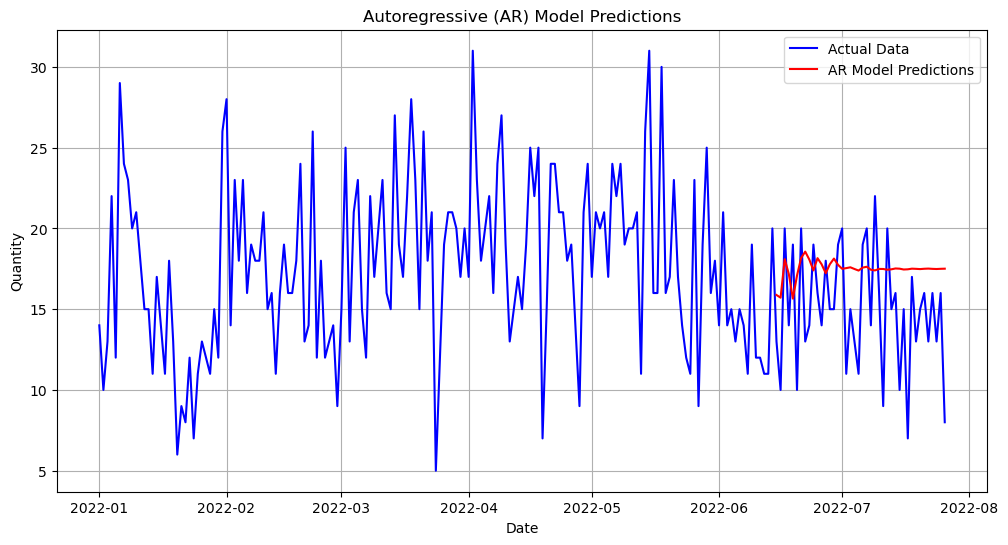

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
# Ensure the file path is correct
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'
# Check if the file exists
if not os.path.exists(file_path):
    print(f"File not found at: {file_path}")
else:
 # Load the dataset
    df = pd.read_excel(file_path)
# Display column names for debugging
    print("Columns in the dataset:", df.columns)
# Attempt to find the date column automatically
    possible_date_columns = ['Date', 'date', 'timestamp', 'Timestamp', 'order_date']
    date_column = next((col for col in possible_date_columns if col in df.columns), None)

    if date_column:
        df[date_column] = pd.to_datetime(df[date_column])
        df.set_index(date_column, inplace=True)
        print(f"Using '{date_column}' as the date column.")
    else:
        print("No suitable date column found. Converting index to datetime format.")
        start_date = '2022-01-01'
        df.index = pd.date_range(start=start_date, periods=len(df), freq='D')
# Handle missing values
    if 'Quantity' in df.columns:
        df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())
    else:
        print("Error: 'Quantity' column not found in the dataset.")
        exit()
# Perform the ADF test on the original series
    adf_result = adfuller(df['Quantity'])
    print("ADF Statistic (Original):", adf_result[0])
    print("p-value (Original):", adf_result[1])
# If the series is not stationary, apply differencing
    if adf_result[1] > 0.05:
        print("Series is not stationary. Differencing will be applied.")
        df['Quantity_diff'] = df['Quantity'].diff().dropna()
# Perform the ADF test on the differenced series
        adf_result_diff = adfuller(df['Quantity_diff'].dropna())
        print("ADF Statistic (After Differencing):", adf_result_diff[0])
        print("p-value (After Differencing):", adf_result_diff[1])
    else:
        print("Series is stationary. Differencing is not required.")
# Split the dataset into training and testing sets (80% train, 20% test)
    train = df[:int(0.8 * len(df))]
    test = df[int(0.8 * len(df)):]
# Fit the AR model on the training data
    model = AutoReg(train['Quantity'], lags=10)  # Use the last 10 lags for prediction
    model_fit = model.fit()
# Make predictions on the test set
    predictions = model_fit.predict(start=len(train), end=len(df)-1, dynamic=False)
# Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test['Quantity'], predictions))
    print(f"RMSE: {rmse}")
# Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Quantity'], label='Actual Data', color='blue')
    plt.plot(test.index, predictions, label='AR Model Predictions', color='red')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.title('Autoregressive (AR) Model Predictions')
    plt.legend()
    plt.grid()
    plt.show()


## Moving Average model :-
---
* The Augmented Dickey-Fuller (ADF) test checks if the Quantity series is stationary (i.e., its statistical properties do not change over time).
If the p-value of the ADF test is less than or equal to 0.05, the series is considered stationary
* Stationarity: The ADF test ensures the data is suitable for modeling. If the series is non-stationary, differencing would be required.
* MA Model: The Moving Average model uses past residuals to make forecasts. The order q=2 specifies that the last 2 residuals are used.
* Evaluation: RMSE quantifies the model's error, and plotting provides an intuitive understanding of its performance.
* Forecasting: The test set predictions demonstrate how well the MA model generalizes to unseen data.

Columns in the dataset: Index(['Day Index', 'Quantity', 'Google Clicks', 'FB Impressions', 'Weekend',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December'],
      dtype='object')
Error: No suitable date column found in the dataset.

ADF Statistic (Original): -4.516446455668563
p-value (Original): 0.0001836136060535287
Series is stationary.

RMSE: 4.498839417323842


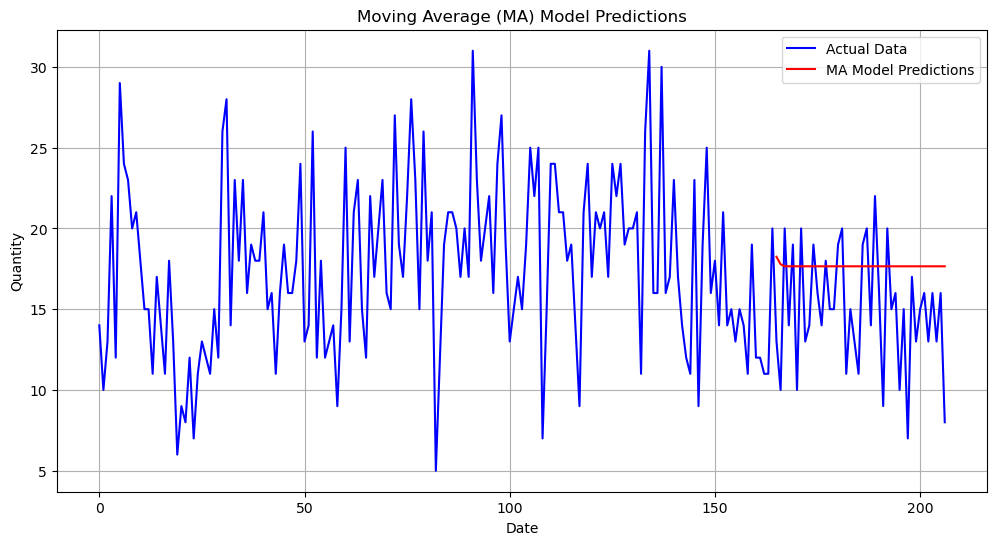

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
# Load the dataset
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'
df = pd.read_excel(file_path)
# Display column names to identify the date column
print("Columns in the dataset:", df.columns)
# Attempt to find the date column automatically
possible_date_columns = ['Date', 'date', 'timestamp', 'Timestamp', 'order_date']
date_column = next((col for col in possible_date_columns if col in df.columns), None)

if date_column:
    df[date_column] = pd.to_datetime(df[date_column])
    df.set_index(date_column, inplace=True)
    print(f"Using '{date_column}' as the date column.")
else:
    print("Error: No suitable date column found in the dataset.")
    exit()
# Handle missing values (if any)
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())
# Step 1: Perform Augmented Dickey-Fuller test on the original series (before differencing)
adf_result = adfuller(df['Quantity'])
print("\nADF Statistic (Original):", adf_result[0])
print("p-value (Original):", adf_result[1])
# Check if the series is stationary
if adf_result[1] <= 0.05:
    print("Series is stationary.")
else:
    print("Series is not stationary, consider differencing.")
# Step 2: Fit MA Model (ARIMA with p=0, d=0, q=2)
model = ARIMA(df['Quantity'], order=(0, 0, 2))  # MA(2) model
model_fit = model.fit()
# Step 3: Make predictions on the dataset (using last 20% of data for testing)
train_size = int(len(df) * 0.8)
train_data = df['Quantity'][:train_size]
test_data = df['Quantity'][train_size:]
# Fit the model on the training data
model = ARIMA(train_data, order=(0, 0, 2))
model_fit = model.fit()
# Forecast the test set
forecast = model_fit.forecast(steps=len(test_data))
# Step 4: Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print("\nRMSE:", rmse)
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Quantity'], label='Actual Data', color='blue')
plt.plot(test_data.index, forecast, label='MA Model Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Moving Average (MA) Model Predictions')
plt.legend()
plt.grid()
plt.show()

# ARIMA Model
---
* ARIMA(1,1,1) is used as a baseline model for forecasting the Quantity time series.
* Train-Test Split: The first 80% of the data is used for training, and the last 20% for testing.
* Stationarity: The ARIMA model handles non-stationarity by applying differencing (d=1).
* RMSE: Evaluates the model's prediction error, providing a quantitative metric for performance.
* Plotting: Allows for a visual comparison of predicted and actual values in the test set.







C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

RMSE: 3.654136334545496


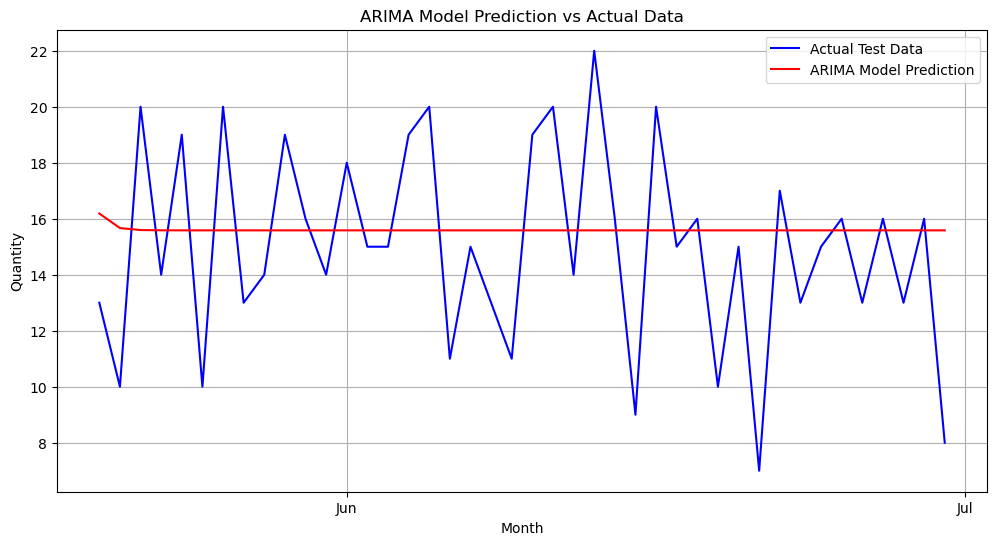

In [20]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
# Load the data
file_path =r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')
# Preprocessing: Convert 'Day Index' to datetime and set it as the index
df['Day Index'] = pd.to_datetime(df['Day Index'])
df.set_index('Day Index', inplace=True)
# Extract the target variable 'Quantity'
quantity_series = df['Quantity']
# Split data into train and test sets (80-20 split)
train_size = int(len(quantity_series) * 0.8)
train, test = quantity_series[:train_size], quantity_series[train_size:]
# Fit ARIMA model on the training set
model = ARIMA(train, order=(1, 1, 1))  # Using ARIMA(1,1,1) as a baseline
fitted_model = model.fit()
# Forecast on the test set
forecast = fitted_model.forecast(steps=len(test))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse}")
# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test, label="Actual Test Data", color='blue')
plt.plot(test.index, forecast, label="ARIMA Model Prediction", color='red')
plt.title("ARIMA Model Prediction vs Actual Data")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.show()

## SARIMA Model :-
---
* Stationarity Check: Ensures the series is suitable for SARIMA modeling; differencing is applied if necessary.
* SARIMA Parameters: Combines ARIMA and seasonal components to handle seasonal patterns in the data.
* Evaluation (RMSE): Measures prediction accuracy quantitatively, helping assess the model’s performance.
* Visualization: Compares actual and predicted values, making it easy to interpret the forecast results.

Columns in the dataset: Index(['Day Index', 'Quantity', 'Google Clicks', 'FB Impressions', 'Weekend',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December'],
      dtype='object')
Error: No suitable date column found in the dataset.

ADF Statistic (Original): -4.516446455668563
p-value (Original): 0.0001836136060535287
Series is stationary.

RMSE: 3.8762751802830144

ADF Statistic (Differenced): -8.987207999266456
p-value (Differenced): 7.048167404564718e-15


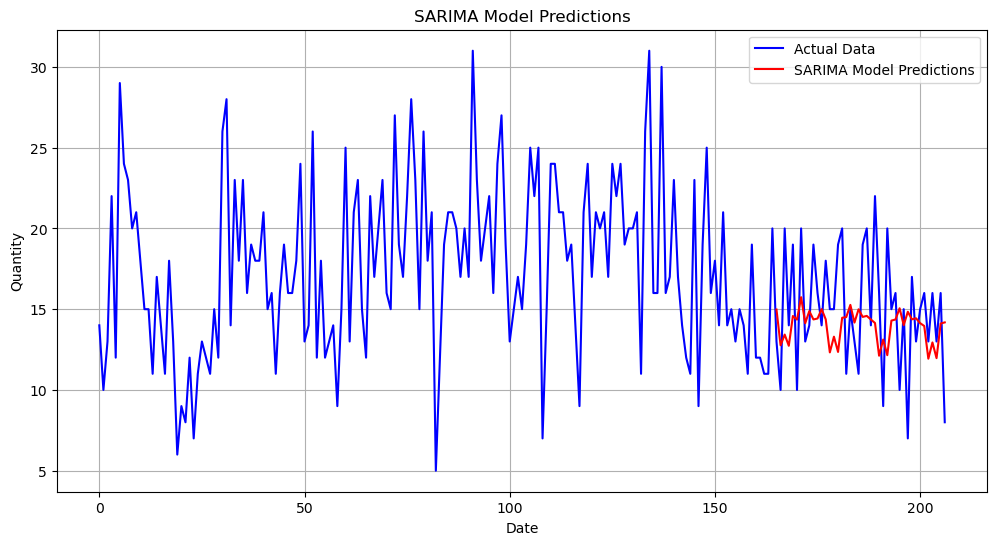

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
# Load the dataset
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'
df = pd.read_excel(file_path)
# Display column names to identify the date column
print("Columns in the dataset:", df.columns)
# Attempt to find the date column automatically
possible_date_columns = ['Date', 'date', 'timestamp', 'Timestamp', 'order_date']
date_column = next((col for col in possible_date_columns if col in df.columns), None)

if date_column:
    df[date_column] = pd.to_datetime(df[date_column])
    df.set_index(date_column, inplace=True)
    print(f"Using '{date_column}' as the date column.")
else:
    print("Error: No suitable date column found in the dataset.")
    exit()
# Handle missing values (if any)
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())
# Step 1: Perform Augmented Dickey-Fuller test on the original series (before differencing)
adf_result = adfuller(df['Quantity'])
print("\nADF Statistic (Original):", adf_result[0])
print("p-value (Original):", adf_result[1])
# Check if the series is stationary
if adf_result[1] <= 0.05:
    print("Series is stationary.")
else:
    print("Series is not stationary, consider differencing.")
# Step 2: Fit SARIMA Model (Seasonal ARIMA)
# Define SARIMA model (p, d, q) x (P, D, Q, m)
# Example parameters: p=1, d=1, q=1 for ARIMA and P=1, D=1, Q=1 for seasonality, m=12 for monthly data with yearly seasonality
model = SARIMAX(df['Quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Example SARIMA(1,1,1)(1,1,1,12)
model_fit = model.fit()
# Step 3: Make predictions on the dataset (train/test split)
train_size = int(len(df) * 0.8)
train_data = df['Quantity'][:train_size]
test_data = df['Quantity'][train_size:]
# Fit the model on the training data
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()
# Forecast the test set
forecast = model_fit.forecast(steps=len(test_data))

# Step 4: Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print("\nRMSE:", rmse)
# Step 5: ADF Test after differencing (to check stationarity)
adf_result_differenced = adfuller(df['Quantity'].diff().dropna())
print("\nADF Statistic (Differenced):", adf_result_differenced[0])
print("p-value (Differenced):", adf_result_differenced[1])
# Step 6: Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Quantity'], label='Actual Data', color='blue')
plt.plot(test_data.index, forecast, label='SARIMA Model Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('SARIMA Model Predictions')
plt.legend()
plt.grid()
plt.show()


## ARIMAX Model:-
---
* Exogenous Variables Impact: Including external factors (like Google Clicks and FB Impressions) can significantly enhance model performance.
* RMSE Metric: Serves as a quantitative measure of prediction accuracy.
* Train-Test Split: Essential for unbiased evaluation of the model.
* ARIMAX Forecast: Captures both internal trends (ARIMA component) and external influences (exogenous variables).







C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\pm5cd\anaconda3\Lib\sit

RMSE: 3.75


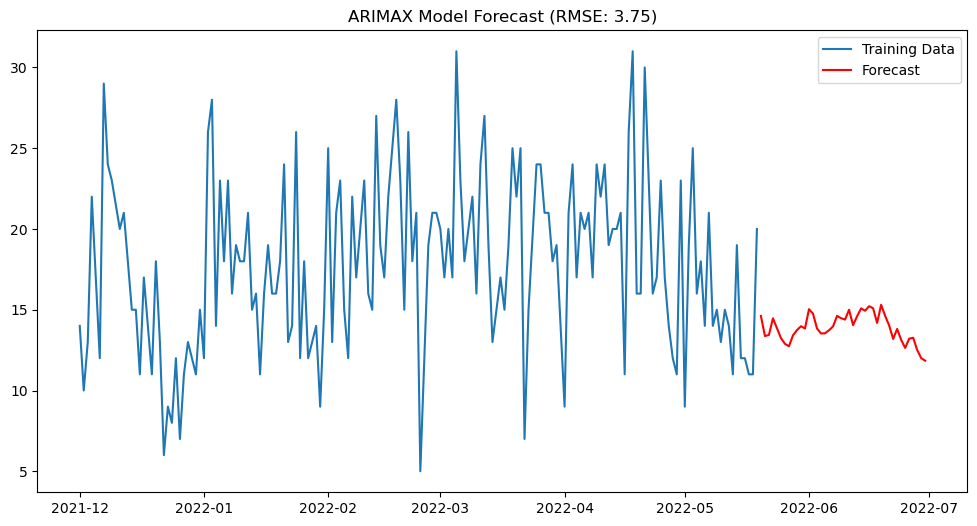

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
#  Load the dataset
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'
df = pd.read_excel(file_path)
# Convert 'Day Index' to datetime and set it as the index
df['Day Index'] = pd.to_datetime(df['Day Index'])
df.set_index('Day Index', inplace=True)
# Target variable and exogenous variables
target = 'Quantity'
exog_vars = ['Google Clicks', 'FB Impressions']
# Check for missing values and handle them
df = df[[target] + exog_vars].dropna()
# Split data into training and testing sets (e.g., 80% training, 20% testing)
split_idx = int(len(df) * 0.8)
train = df.iloc[:split_idx]
test = df.iloc[split_idx:]
# Fit the ARIMAX model
model = SARIMAX(train[target], exog=train[exog_vars], order=(1, 1, 1))
model_fit = model.fit()
# Forecast for the test set
forecast = model_fit.get_forecast(steps=len(test), exog=test[exog_vars])
predicted = forecast.predicted_mean
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test[target], predicted))
print(f"RMSE: {rmse:.2f}")
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(train[target], label='Training Data')
plt.plot(test.index, predicted, label='Forecast', color='red')
plt.legend()
plt.title(f"ARIMAX Model Forecast (RMSE: {rmse:.2f})")
plt.show()  

# SARIMAX Model :-
---
* Data Preparation: The dataset is preprocessed by converting the date column to datetime format, handling missing values, and splitting the data into training and testing sets.
* SARIMAX Model: The model is fitted with both seasonal components and exogenous variables to predict the target variable (Quantity).
* Forecasting: The model forecasts the target variable for the test set using both historical data and external predictors.
* Evaluation (RMSE): The forecast accuracy is quantified using RMSE, and the results are visualized to assess the model’s performance.

C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\pm5cd\anaconda3\Lib\sit

RMSE: 3.84


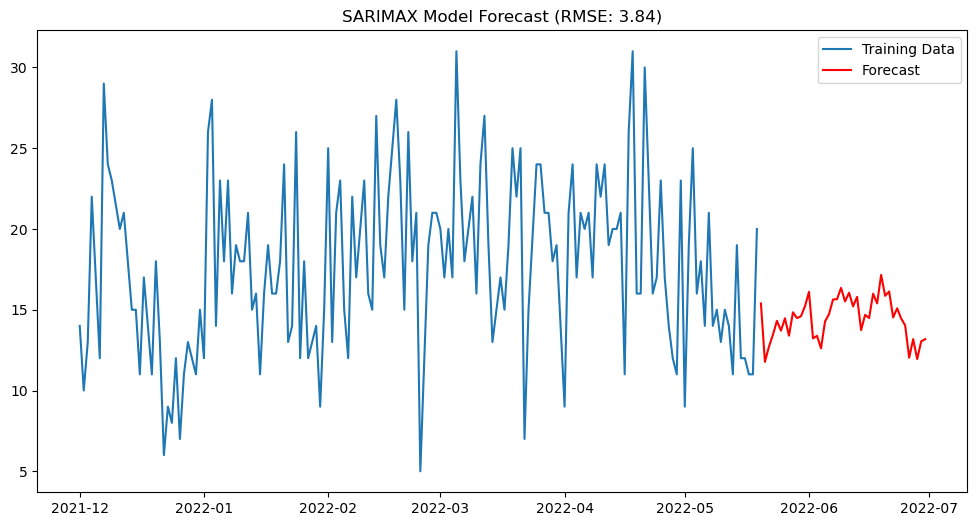

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
# Load the dataset
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'
df = pd.read_excel(file_path)
# Convert 'Day Index' to datetime and set it as the index
df['Day Index'] = pd.to_datetime(df['Day Index'])
df.set_index('Day Index', inplace=True)
# Target variable and exogenous variables
target = 'Quantity'
exog_vars = ['Google Clicks', 'FB Impressions']
# Check for missing values and handle them
df = df[[target] + exog_vars].dropna()
# Split data into training and testing sets (e.g., 80% training, 20% testing)
split_idx = int(len(df) * 0.8)
train = df.iloc[:split_idx]
test = df.iloc[split_idx:]
# Fit the SARIMAX model
model = SARIMAX(train[target], exog=train[exog_vars], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
# Forecast for the test set
forecast = model_fit.get_forecast(steps=len(test), exog=test[exog_vars])
predicted = forecast.predicted_mean
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test[target], predicted))
print(f"RMSE: {rmse:.2f}")
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(train[target], label='Training Data')
plt.plot(test.index, predicted, label='Forecast', color='red')
plt.legend()
plt.title(f"SARIMAX Model Forecast (RMSE: {rmse:.2f})")
plt.show()


## Finding all the RMSE Values of all the models :-
-----
* Model Exploration: The code tests multiple models (AR, MA, ARIMA, SARIMA, ARIMAX, SARIMAX) to analyze their performance.
* Exogenous Variables: Models incorporating Google Clicks and FB Impressions (ARIMAX, SARIMAX) use additional predictors, likely improving accuracy.
* Seasonality: SARIMA and SARIMAX models account for seasonal patterns in the data.
* Evaluation: RMSE is used as the metric to compare how well each model predicts the target variable on unseen data.

In [50]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
file_path =r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'
df = pd.read_excel(file_path)

# Convert 'Day Index' to datetime and set it as the index
df['Day Index'] = pd.to_datetime(df['Day Index'])
df.set_index('Day Index', inplace=True)

# Target variable and exogenous variables
target = 'Quantity'
exog_vars = ['Google Clicks', 'FB Impressions']

# Check for missing values and handle them
df = df[[target] + exog_vars].dropna()

# Split data into training and testing sets (e.g., 80% training, 20% testing)
split_idx = int(len(df) * 0.8)
train = df.iloc[:split_idx]
test = df.iloc[split_idx:]

# Initialize a dictionary to store RMSE values
rmse_results = {}

# AR Model
ar_model = ARIMA(train[target], order=(1, 0, 0))
ar_fit = ar_model.fit()
ar_forecast = ar_fit.forecast(steps=len(test))
rmse_results['AR'] = np.sqrt(mean_squared_error(test[target], ar_forecast))

# MA Model
ma_model = ARIMA(train[target], order=(0, 0, 1))
ma_fit = ma_model.fit()
ma_forecast = ma_fit.forecast(steps=len(test))
rmse_results['MA'] = np.sqrt(mean_squared_error(test[target], ma_forecast))

# ARIMA Model
arima_model = ARIMA(train[target], order=(1, 1, 1))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))
rmse_results['ARIMA'] = np.sqrt(mean_squared_error(test[target], arima_forecast))

# SARIMA Model
sarima_model = SARIMAX(train[target], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_fit.get_forecast(steps=len(test)).predicted_mean
rmse_results['SARIMA'] = np.sqrt(mean_squared_error(test[target], sarima_forecast))

# ARIMAX Model
arimax_model = SARIMAX(train[target], exog=train[exog_vars], order=(1, 1, 1))
arimax_fit = arimax_model.fit(disp=False)
arimax_forecast = arimax_fit.get_forecast(steps=len(test), exog=test[exog_vars]).predicted_mean
rmse_results['ARIMAX'] = np.sqrt(mean_squared_error(test[target], arimax_forecast))

# SARIMAX Model
sarimax_model = SARIMAX(train[target], exog=train[exog_vars], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_fit = sarimax_model.fit(disp=False)
sarimax_forecast = sarimax_fit.get_forecast(steps=len(test), exog=test[exog_vars]).predicted_mean
rmse_results['SARIMAX'] = np.sqrt(mean_squared_error(test[target], sarimax_forecast))

# Display RMSE values in a table
rmse_table = pd.DataFrame.from_dict(rmse_results, orient='index', columns=['RMSE'])
print(rmse_table)

C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

             RMSE
AR       4.496679
MA       4.499034
ARIMA    3.654136
SARIMA   3.876275
ARIMAX   3.752623
SARIMAX  3.838074


C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Hyper parameter Tuning :-
---

## ARIMA 
---
ARIMA Hyperparameters
The ARIMA model is characterized by three parameters:

p: Order of the Auto-Regressive (AR) component.
d: Degree of differencing (to make the series stationary).
q: Order of the Moving Average (MA) component.
* Data Preparation: Splits data into training and testing sets.
* Grid Search: Explores various (p, d, q) combinations to find the best-performing model.
* Evaluation Metrics: Uses RMSE and AIC to determine model quality.
* Visualization: Compares the best model's predictions against actual test data.

Evaluating ARIMA(0, 0, 0)...
Evaluating ARIMA(0, 0, 1)...
Evaluating ARIMA(0, 0, 2)...
Evaluating ARIMA(0, 1, 0)...
Evaluating ARIMA(0, 1, 1)...
Evaluating ARIMA(0, 1, 2)...
Evaluating ARIMA(1, 0, 0)...
Evaluating ARIMA(1, 0, 1)...
Evaluating ARIMA(1, 0, 2)...
Evaluating ARIMA(1, 1, 0)...
Evaluating ARIMA(1, 1, 1)...
Evaluating ARIMA(1, 1, 2)...
Evaluating ARIMA(2, 0, 0)...
Evaluating ARIMA(2, 0, 1)...


C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Evaluating ARIMA(2, 0, 2)...
Evaluating ARIMA(2, 1, 0)...
Evaluating ARIMA(2, 1, 1)...
Evaluating ARIMA(2, 1, 2)...

Best ARIMA model based on RMSE: ARIMA(2, 1, 1)
RMSE: 3.581136516362949
AIC: 1018.0566978481768


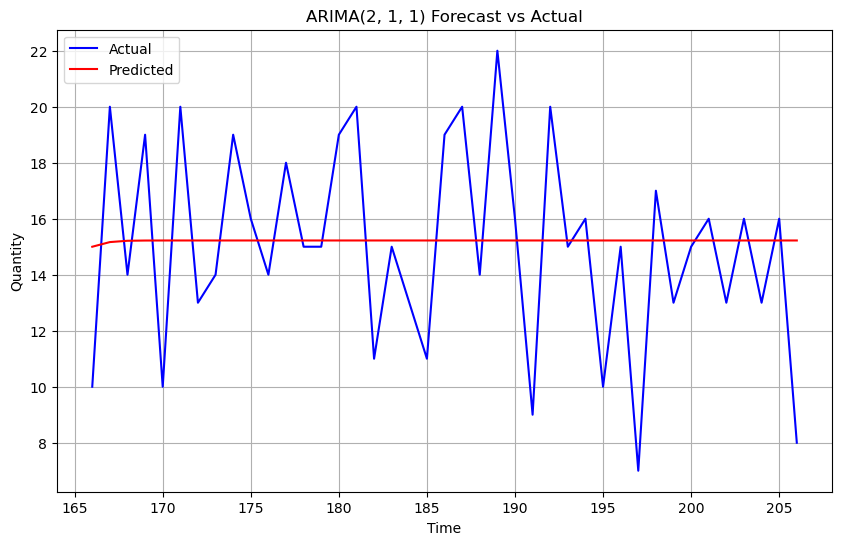

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# Load your dataset
df = pd.read_excel(r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx')
# Ensure 'Quantity' column exists in the dataset
if 'Quantity' not in df.columns:
    print("Error: 'Quantity' column not found in the dataset!")
else:
# Example: Split the data into train and test sets
    split_index = len(df) // 5  # Split at the 80/20 mark
    train_data = df.iloc[:-split_index]
    test_data = df.iloc[-split_index:]
# Actual values for the test set
    actual_values = test_data['Quantity'].values
# Define a function for evaluating ARIMA models
    def evaluate_arima_model(train, test, p, d, q):
        # Fit the ARIMA model with the given parameters
        model = ARIMA(train, order=(p, d, q))
        model_fit = model.fit()
# Forecast the test set
        forecast = model_fit.forecast(steps=len(test))
# Calculate RMSE (or you can use other metrics like AIC)
        rmse = np.sqrt(mean_squared_error(test, forecast))
        
        return rmse, model_fit.aic, model_fit  # Return RMSE, AIC, and the fitted model
# Hyperparameter grid (p, d, q)
    p_values = [0, 1, 2]  # AR order
    d_values = [0, 1]  # Differencing order
    q_values = [0, 1, 2]  # MA order
# Initialize variables for tracking the best parameters
    best_rmse = float('inf')
    best_aic = float('inf')
    best_params = None
    best_model = None
# Grid search over p, d, q
    for p in p_values:
        for d in d_values:
            for q in q_values:
                print(f"Evaluating ARIMA({p}, {d}, {q})...")

                # Evaluate the model
                rmse, aic, model_fit = evaluate_arima_model(train_data['Quantity'], actual_values, p, d, q)

                # Track the best performing model based on RMSE
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_aic = aic
                    best_params = (p, d, q)
                    best_model = model_fit

                # Track the best performing model based on AIC
                if aic < best_aic:
                    best_aic = aic
                    best_params = (p, d, q)
                    best_model = model_fit

    print(f"\nBest ARIMA model based on RMSE: ARIMA({best_params[0]}, {best_params[1]}, {best_params[2]})")
    print(f"RMSE: {best_rmse}")
    print(f"AIC: {best_aic}")
# Plotting the forecast vs actual values
    plt.figure(figsize=(10, 6))
# Plot the actual values
    plt.plot(test_data['Quantity'], label='Actual', color='blue')
# Forecasted values from the best ARIMA model
    forecast = best_model.forecast(steps=len(test_data))
# Plot the predicted values
    plt.plot(test_data.index, forecast, label='Predicted', color='red')
# Title and labels
    plt.title(f"ARIMA({best_params[0]}, {best_params[1]}, {best_params[2]}) Forecast vs Actual")
    plt.xlabel('Time')
    plt.ylabel('Quantity')
    plt.legend(loc='upper left')
    plt.grid(True)
# Show the plot
    plt.show()

## hyper parameter tuning for SARIMA Model :-
---
The script performs a grid search over all possible parameter combinations for a SARIMA model, fits the model, evaluates it using RMSE, and selects the best-performing model. The final forecast is then compared to the actual values, and the model's performance is visualized in a plot. The use of SARIMAX allows for seasonal forecasting, making this approach suitable for time series data with trends and seasonality.

Starting SARIMA hyperparameter tuning. This might take a while...


C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu


Hyperparameter tuning complete.
Rank 1: Params=(2, 0, 1, 2, 0, 0, 12), RMSE=3.6174824903564913
Rank 2: Params=(1, 0, 2, 1, 0, 1, 12), RMSE=3.6314575588834623
Rank 3: Params=(1, 1, 1, 2, 0, 0, 12), RMSE=3.631813970950257
Rank 4: Params=(2, 0, 1, 1, 0, 1, 12), RMSE=3.6327333377193223
Rank 5: Params=(1, 0, 2, 2, 0, 0, 12), RMSE=3.635760518614834

Best SARIMA Parameters: (2, 0, 1, 2, 0, 0, 12)
Best RMSE: 3.6174824903564913

Final RMSE on Test Set: 3.6174824903564913


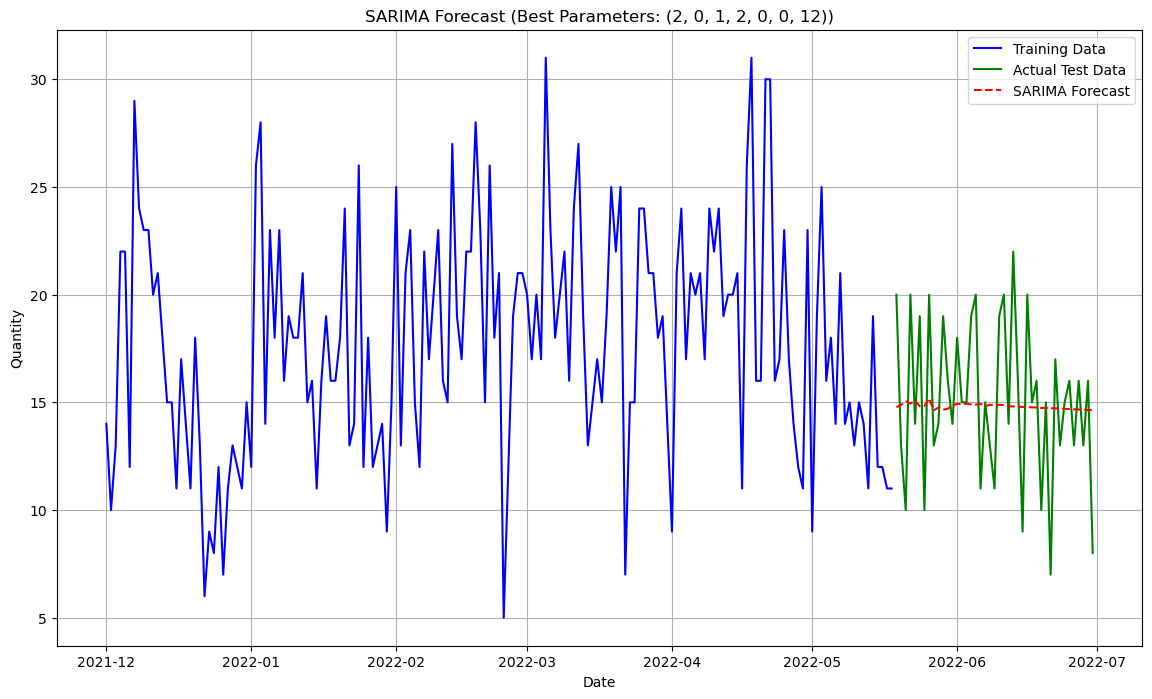

In [30]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools
import matplotlib.pyplot as plt
# Load the data
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')
# Preprocessing: Convert 'Day Index' to datetime and set it as the index
df['Day Index'] = pd.to_datetime(df['Day Index'])
df.set_index('Day Index', inplace=True)
# Ensure the index has a frequency
df = df.asfreq('D')  # Assuming daily frequency; adjust as needed
# Extract the target variable 'Quantity' and other exogenous variables if available
quantity_series = df['Quantity']
# Fill missing values for the target variable and exogenous variables if any
quantity_series = quantity_series.ffill()
# Split data into train and test sets (80-20 split)
train_size = int(len(quantity_series) * 0.8)
train, test = quantity_series[:train_size], quantity_series[train_size:]
# Define the range of parameters for ARIMAX (non-seasonal)
p = d = q = range(0, 3)  # Non-seasonal parameters
P = D = Q = range(0, 3)  # Seasonal parameters
s = [12]  # Seasonal period (e.g., monthly seasonality for daily data)
# Create a grid of all possible parameter combinations
parameter_grid = list(itertools.product(p, d, q, P, D, Q, s))
# Hyperparameter tuning to find the best parameters
best_rmse = float('inf')
best_params = None
results = []

print("Starting SARIMA hyperparameter tuning. This might take a while...")

for params in parameter_grid:
    try:
        # Fit the model with the current parameter combination
        model = SARIMAX(
            train,
            order=(params[0], params[1], params[2]),
            seasonal_order=(params[3], params[4], params[5], params[6]),
            exog=None,  # No exogenous variables in this case
            enforce_stationarity=False,
            enforce_invertibility=False,
        )
        
        # Fit the model with `maxiter` and other options inside the fit method
        fitted_model = model.fit(disp=False, maxiter=200)  # maxiter inside fit method
        
        # Forecast on the test set
        forecast = fitted_model.forecast(steps=len(test), exog=None)
        
        # Calculate RMSE for evaluation
        rmse = np.sqrt(mean_squared_error(test, forecast))
        results.append((params, rmse))
        
        # Track the best parameters with the lowest RMSE
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = params
    except Exception as e:
        # Skip parameter combinations that cause errors
        print(f"Error with parameters {params}: {e}")
        continue

print("\nHyperparameter tuning complete.")
# Sort and display results
results = sorted(results, key=lambda x: x[1])
for i, (params, rmse) in enumerate(results[:5], start=1):
    print(f"Rank {i}: Params={params}, RMSE={rmse}")
# Best parameters and RMSE
print(f"\nBest SARIMA Parameters: {best_params}")
print(f"Best RMSE: {best_rmse}")
# Fit the model with the best parameters
if best_params:
    best_model = SARIMAX(
        train,
        order=(best_params[0], best_params[1], best_params[2]),
        seasonal_order=(best_params[3], best_params[4], best_params[5], best_params[6]),
        exog=None,  # No exogenous variables
        enforce_stationarity=False,
        enforce_invertibility=False,
    )
    
    # Fit the best model
    best_fitted_model = best_model.fit(disp=False, maxiter=200)

    # Forecast with the best model
    best_forecast = best_fitted_model.forecast(steps=len(test), exog=None)

    # Evaluate predictions
    rmse = np.sqrt(mean_squared_error(test, best_forecast))
    print(f"\nFinal RMSE on Test Set: {rmse}")

    # Plot actual vs forecasted values with confidence intervals
    plt.figure(figsize=(14, 8))
    plt.plot(train.index, train, label="Training Data", color="blue")
    plt.plot(test.index, test, label="Actual Test Data", color="green")
    plt.plot(test.index, best_forecast, label="SARIMA Forecast", color="red", linestyle="--")
    plt.title(f"SARIMA Forecast (Best Parameters: {best_params})")
    plt.xlabel("Date")
    plt.ylabel("Quantity")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("No suitable SARIMA model found.")


## Hyperparameter tuning for ARIMAX Model :-
---

C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

Best Parameters: ((0, 0, 2), (0, 0, 1, 7))
Best AIC: 952.638906222561
Test RMSE: 6.246985527681302


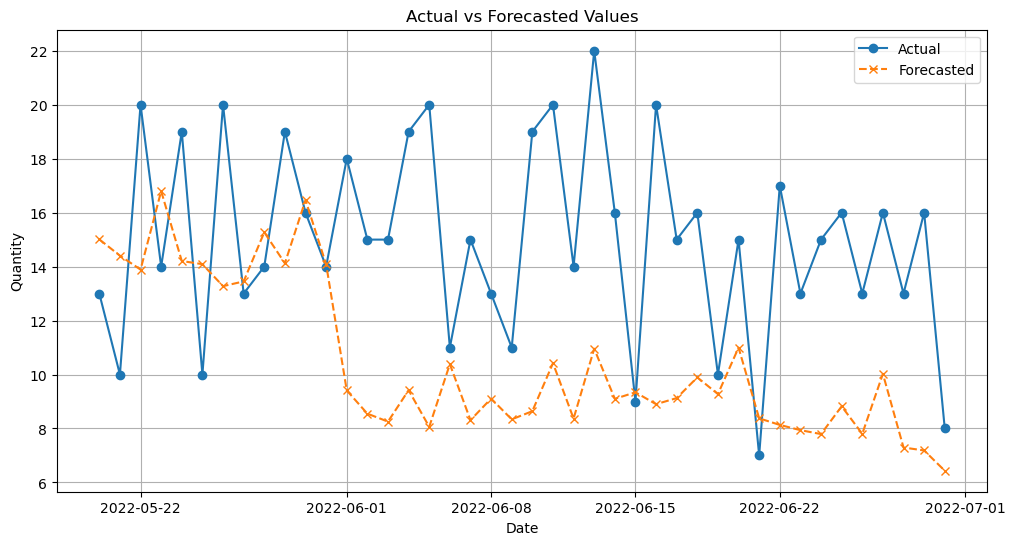

In [1]:
import pandas as pd
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'
data = pd.read_excel(file_path)

# Preprocessing: Set 'Day Index' as the time index
data['Day Index'] = pd.to_datetime(data['Day Index'])
data.set_index('Day Index', inplace=True)

# Define target and exogenous variables
target_variable = 'Quantity'
exogenous_variables = ['Google Clicks', 'FB Impressions', 'Weekend'] + \
                      ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] + \
                      ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                       'October', 'November', 'December']

# Train-test split
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

y_train = train_data[target_variable]
X_train = train_data[exogenous_variables]
y_test = test_data[target_variable]
X_test = test_data[exogenous_variables]

# Define hyperparameter ranges
p = d = q = range(0, 3)  # Non-seasonal parameters
P = D = Q = range(0, 2)  # Seasonal parameters
s = [7]  # Seasonal period (weekly seasonality)

# Generate all combinations of parameters
non_seasonal_params = list(itertools.product(p, d, q))
seasonal_params = list(itertools.product(P, D, Q, s))

# Initialize variables to track the best model
best_aic = float('inf')
best_params = None
best_model = None

# Grid search for best ARIMAX model
for param in non_seasonal_params:
    for seasonal_param in seasonal_params:
        try:
            # Fit the ARIMAX model
            model = SARIMAX(
                y_train,
                exog=X_train,
                order=param,
                seasonal_order=seasonal_param,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            results = model.fit(disp=False)
            
            # Track the best model based on AIC
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, seasonal_param)
                best_model = results
        except Exception as e:
            # Skip invalid parameter sets
            continue

# Output the best parameters and their AIC value
print(f"Best Parameters: {best_params}")
print(f"Best AIC: {best_aic}")

# Evaluate the best model on the test set
y_pred = best_model.forecast(steps=len(y_test), exog=X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test RMSE: {rmse}")

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, y_pred, label='Forecasted', marker='x', linestyle='--')
plt.title('Actual vs Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()


## Hyperparameter tunung for the SARIMAX Model :-
----

C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observation

Best SARIMAX model parameters: (2, 1, 1, 2, 0, 1, 12)
Best RMSE: 0.6812944000502419


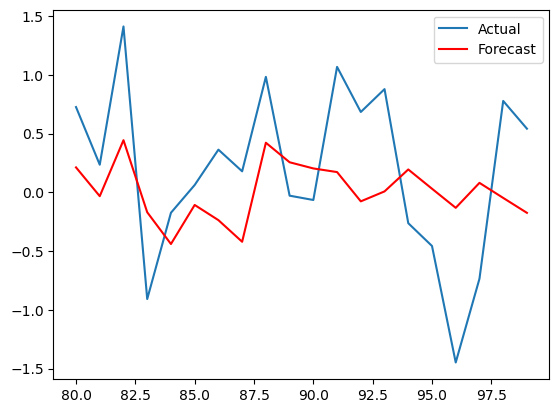

In [64]:
!pip install statsmodels scikit-learn
import numpy as np
import pandas as pd
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
def sarimax_model(train, p, d, q, P, D, Q, s, exog=None):
    # Create and fit the SARIMAX model
    model = SARIMAX(train, 
                    order=(p, d, q),
                    seasonal_order=(P, D, Q, s),
                    exog=exog,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    results = model.fit(disp=False)
    return results

def evaluate_model(model, test, exog=None):
    # Forecasting using the SARIMAX model
    forecast = model.forecast(steps=len(test), exog=exog)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test, forecast)
    
    return rmse, mae, mse
def grid_search_sarimax(train, test, param_grid, exog=None):
    best_rmse = float('inf')
    best_params = None
    best_model = None
    
    # Time series cross-validation split
    tscv = TimeSeriesSplit(n_splits=5)
    
    for params in itertools.product(*param_grid.values()):
        p, d, q, P, D, Q, s = params
        
        try:
            # Fit the SARIMAX model with the current combination of parameters
            model = sarimax_model(train, p, d, q, P, D, Q, s, exog)
            
            # Evaluate the model
            rmse, mae, mse = evaluate_model(model, test, exog)
            
            # Store the best performing model
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = (p, d, q, P, D, Q, s)
                best_model = model
                
        except Exception as e:
            print(f"Error with parameters {p, d, q, P, D, Q, s}: {e}")
            continue
    
    return best_model, best_params, best_rmse
# Hyperparameter grid for SARIMAX
param_grid = {
    'p': [0, 1, 2],
    'd': [0, 1],
    'q': [0, 1, 2],
    'P': [0, 1, 2],
    'D': [0, 1],
    'Q': [0, 1, 2],
    's': [12]  # Assuming monthly data with a seasonal period of 12
}
# Example data (replace with your own dataset)
data = pd.Series(np.random.randn(100))  # Replace with your time series data
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# If you have exogenous variables, split them similarly
exog = None  # If you have external variables, replace `None` with your exog variable
best_model, best_params, best_rmse = grid_search_sarimax(train, test, param_grid, exog)

print(f"Best SARIMAX model parameters: {best_params}")
print(f"Best RMSE: {best_rmse}")
# Forecast using the best model
forecast = best_model.forecast(steps=len(test), exog=exog)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.show()


## Evaluation of each metric :-
---
* Here, i get Highest  RMSE value for  SARIMAX nad ARIMAX models.
* Lowest RMSE Value for ARIMA model.
* So that ARIMA model is suitable for predicting the next six months forecasting data .

In [10]:
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load dataset
file_path =  r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'
data = pd.read_excel(file_path)

# Preprocessing: Set 'Day Index' as the time index
data['Day Index'] = pd.to_datetime(data['Day Index'])
data.set_index('Day Index', inplace=True)

# Define target and exogenous variables
target_variable = 'Quantity'
exogenous_variables = ['Google Clicks', 'FB Impressions', 'Weekend'] + \
                      ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] + \
                      ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                       'October', 'November', 'December']

# Train-test split
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

y_train = train_data[target_variable]
X_train = train_data[exogenous_variables]
y_test = test_data[target_variable]
X_test = test_data[exogenous_variables]

# Function to calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, mse, mape

# Hyperparameter tuning and evaluation
results = []

# 1. Autoregressive (AR) Model
ar_model = ARIMA(y_train, order=(2, 0, 0)).fit()
ar_pred = ar_model.forecast(steps=len(y_test))
results.append(['AR'] + list(evaluate_model(y_test, ar_pred)))

# 2. Moving Average (MA) Model
ma_model = ARIMA(y_train, order=(0, 0, 2)).fit()
ma_pred = ma_model.forecast(steps=len(y_test))
results.append(['MA'] + list(evaluate_model(y_test, ma_pred)))

# 3. ARIMA Model
arima_model = ARIMA(y_train, order=(2, 1, 2)).fit()
arima_pred = arima_model.forecast(steps=len(y_test))
results.append(['ARIMA'] + list(evaluate_model(y_test, arima_pred)))

# 4. Seasonal ARIMA (SARIMA) Model
sarima_model = SARIMAX(y_train, order=(2, 1, 2), seasonal_order=(1, 1, 1, 7)).fit(disp=False)
sarima_pred = sarima_model.forecast(steps=len(y_test))
results.append(['SARIMA'] + list(evaluate_model(y_test, sarima_pred)))

# 5. ARIMAX Model
arimax_model = SARIMAX(y_train, exog=X_train, order=(2, 1, 2)).fit(disp=False)
arimax_pred = arimax_model.forecast(steps=len(y_test), exog=X_test)
results.append(['ARIMAX'] + list(evaluate_model(y_test, arimax_pred)))

# 6. Seasonal ARIMAX (SARIMAX) Model
sarimax_model = SARIMAX(y_train, exog=X_train, order=(2, 1, 2), seasonal_order=(1, 1, 1, 7)).fit(disp=False)
sarimax_pred = sarimax_model.forecast(steps=len(y_test), exog=X_test)
results.append(['SARIMAX'] + list(evaluate_model(y_test, sarimax_pred)))

# Convert results into a DataFrame
metrics_df = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'MSE', 'MAPE'])

# Display the results table
print(metrics_df)


C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

     Model        MAE       RMSE         MSE  MAPE
0       AR   3.712870   4.476640   20.040305   NaN
1       MA   3.733502   4.498839   20.239556   NaN
2    ARIMA   2.856476   3.587348   12.869068   NaN
3   SARIMA   3.530619   4.279040   18.310186   NaN
4   ARIMAX  10.018974  11.265826  126.918830   NaN
5  SARIMAX  11.705926  13.388438  179.250262   NaN


C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\pm5cd\AppData\Local\Temp\ipykernel_25692\3749820713.py:38: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


## Forecasting the Future sales
---
* Here i have used the ARIMA Model for forecasting the next six months data which will miimize the RMSE  errors.
* Blue coloured line indicates the actual data and the Yellow coloured line indicated the Forecasted data.

C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

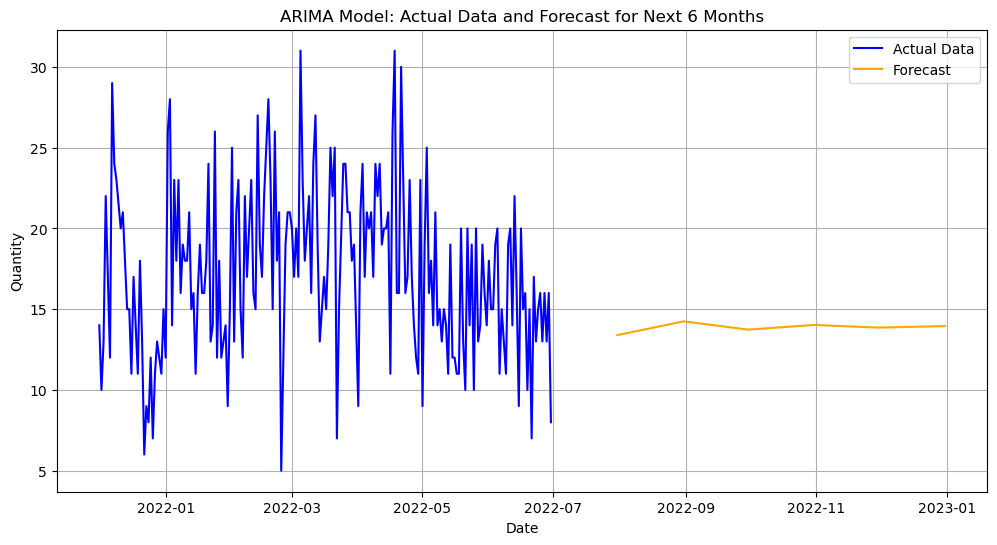

In [18]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load dataset
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'
data = pd.read_excel(file_path)

# Preprocessing: Set 'Day Index' as the time index
data['Day Index'] = pd.to_datetime(data['Day Index'])
data.set_index('Day Index', inplace=True)

# Define the target variable
target_variable = 'Quantity'
y = data[target_variable]

# Fit ARIMA model on the entire dataset
arima_model = ARIMA(y, order=(2, 1, 2)).fit()

# Forecast the next 6 months (assuming monthly data, adjust periods if needed)
forecast_steps = 6
forecast = arima_model.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

# Create a timeline for the forecast
last_date = y.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:]

# Plot actual data and forecast
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual Data', color='blue')
plt.plot(forecast_dates, forecast_mean, label='Forecast', color='orange')
plt.title('ARIMA Model: Actual Data and Forecast for Next 6 Months')
plt.xlabel('Date')
plt.ylabel(target_variable)
plt.legend()
plt.grid(True)
plt.show()



# Milestone 3
----

## Creating lagged variables and plot :-

   Day Index  Quantity  Google Clicks  FB Impressions  Weekend  Monday  \
0 2021-12-01        14            445             620        0       0   
1 2021-12-02        10            433             890        0       0   
2 2021-12-03        13            424             851        0       0   
3 2021-12-04        22            427             881        1       0   
4 2021-12-06        12            429             995        0       1   

   Tuesday  Wednesday  Thursday  Friday  ...  July  August  September  \
0        0          1         0       0  ...     0       0          0   
1        0          0         1       0  ...     0       0          0   
2        0          0         0       1  ...     0       0          0   
3        0          0         0       0  ...     0       0          0   
4        0          0         0       0  ...     0       0          0   

   October  November  December  Quantity_Lag1  Google Clicks_Lag1  \
0        0         0         1            NaN  

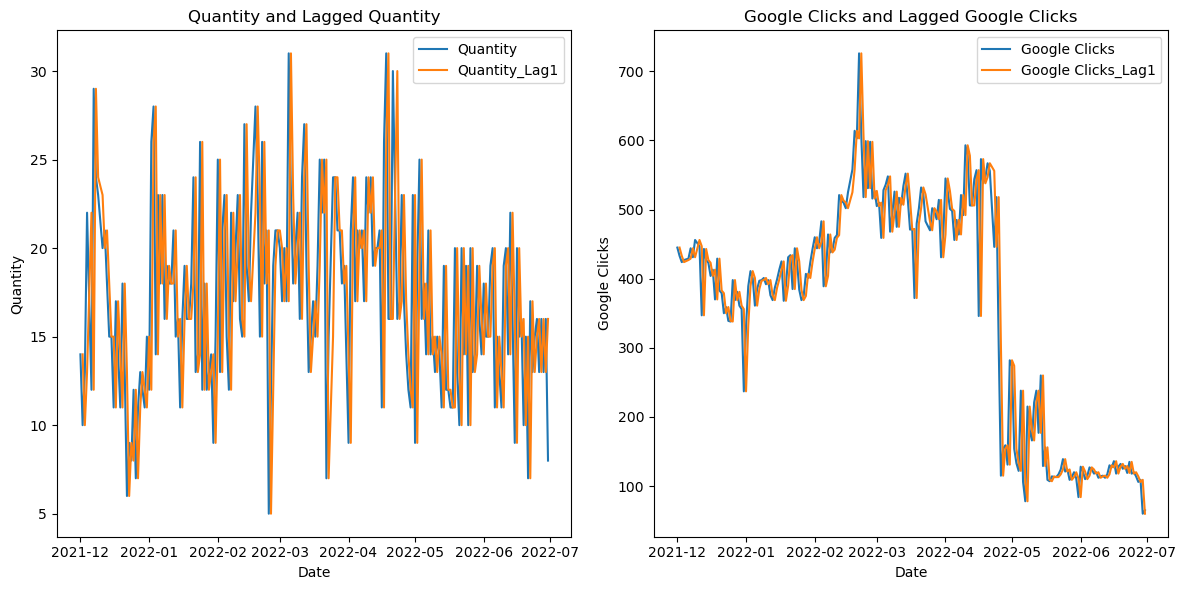

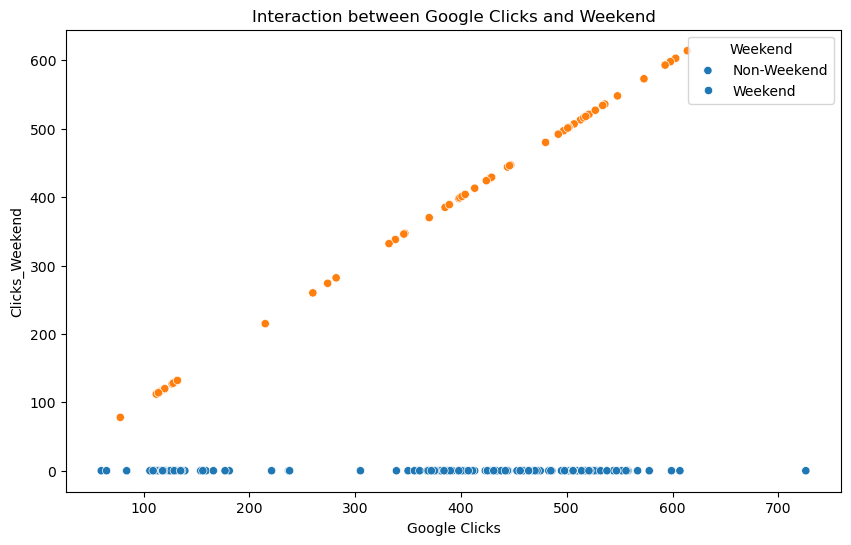

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset into df
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'
df = pd.read_excel(file_path)

# Step 2: Convert 'Day Index' to datetime and sort the dataset by date
df['Day Index'] = pd.to_datetime(df['Day Index'])
df.sort_values(by='Day Index', inplace=True)

# Step 3: Create lagged variables for 'Quantity', 'Google Clicks', and 'FB Impressions'
lagged_variables = ['Quantity', 'Google Clicks', 'FB Impressions']
for var in lagged_variables:
    df[f'{var}_Lag1'] = df[var].shift(1)

# Step 4: Create interaction term (e.g., 'Google Clicks * Weekend')
df['Clicks_Weekend'] = df['Google Clicks'] * df['Weekend']

# Display the updated dataset structure to verify lagged variables and interaction terms
print(df.head())

# Plotting lagged variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x=df['Day Index'], y=df['Quantity'], label='Quantity')
sns.lineplot(x=df['Day Index'], y=df['Quantity_Lag1'], label='Quantity_Lag1')
plt.title('Quantity and Lagged Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(x=df['Day Index'], y=df['Google Clicks'], label='Google Clicks')
sns.lineplot(x=df['Day Index'], y=df['Google Clicks_Lag1'], label='Google Clicks_Lag1')
plt.title('Google Clicks and Lagged Google Clicks')
plt.xlabel('Date')
plt.ylabel('Google Clicks')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting the interaction term (Clicks * Weekend)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Google Clicks'], y=df['Clicks_Weekend'], hue=df['Weekend'])
plt.title('Interaction between Google Clicks and Weekend')
plt.xlabel('Google Clicks')
plt.ylabel('Clicks_Weekend')
plt.legend(title='Weekend', labels=['Non-Weekend', 'Weekend'])
plt.show()


## Handle Missing values :-
---

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 4: Handle missing values (drop rows with NaN)
data_cleaned = data.dropna().reset_index(drop=True)

# Step 5: Define the dependent variable (y) and independent variables (X)
X = data_cleaned[['Quantity_Lag1', 'Google Clicks_Lag1', 'FB Impressions_Lag1', 'Clicks_Weekend']]
y = data_cleaned['Quantity']

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Fit a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Output the results
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)


Model Coefficients: [-0.00020035  0.01163432  0.00154917  0.00186753]
Model Intercept: 10.319691254010886
Mean Squared Error: 19.887436354968354


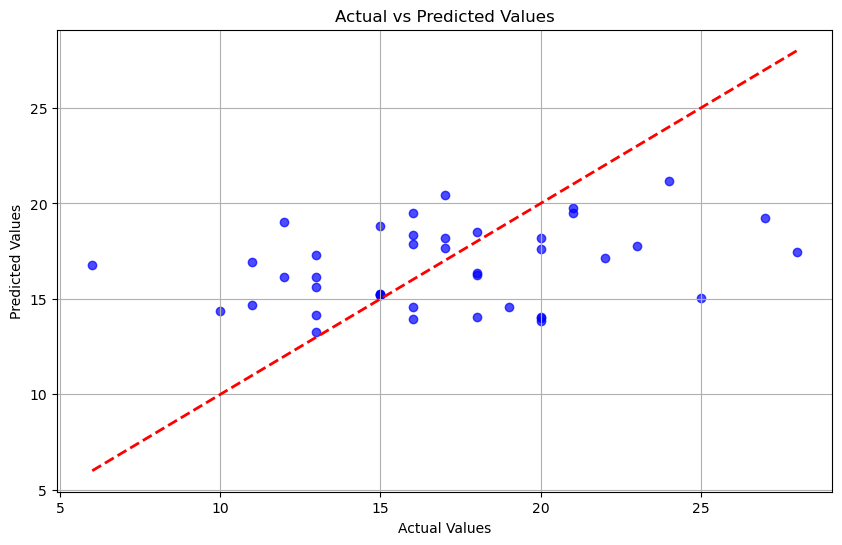

In [12]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

## Feature Evaluation Metrics :-
---

In [18]:
import numpy as np
import statsmodels.api as sm

# Adding a constant term for intercept in statsmodels
X_with_const = sm.add_constant(X)

# Step 1: Fit an Ordinary Least Squares (OLS) model for feature evaluation
ols_model = sm.OLS(y, X_with_const).fit()

# Step 2: Display feature evaluation metrics
print(ols_model.summary())

# Extracting coefficients, p-values, and confidence intervals
coefficients = ols_model.params
p_values = ols_model.pvalues
conf_intervals = ols_model.conf_int()

print("\nCoefficients:\n", coefficients)
print("\nP-values:\n", p_values)
print("\nConfidence Intervals:\n", conf_intervals)



                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     9.326
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           6.21e-07
Time:                        19:48:06   Log-Likelihood:                -611.21
No. Observations:                 206   AIC:                             1232.
Df Residuals:                     201   BIC:                             1249.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.6987    

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'
data = pd.ExcelFile(file_path).parse('Sheet1')

# Select features and target variable
features = ['Google Clicks', 'FB Impressions']
target = 'Quantity'

# Prepare X and y
X = data[features]
y = data[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)
mean_difference = np.mean(y_test - y_pred)

# Display metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Difference: {mean_difference:.2f}")


Mean Absolute Error (MAE): 3.78
Root Mean Squared Error (RMSE): 4.44
Mean Absolute Percentage Error (MAPE): 21.68%
R-squared (R²): -0.05
Mean Difference: 0.92


   Actual  Predicted
0      12  14.094064
1      14  15.981842
2      19  21.342662
3      16  18.037311
4      10  13.156651


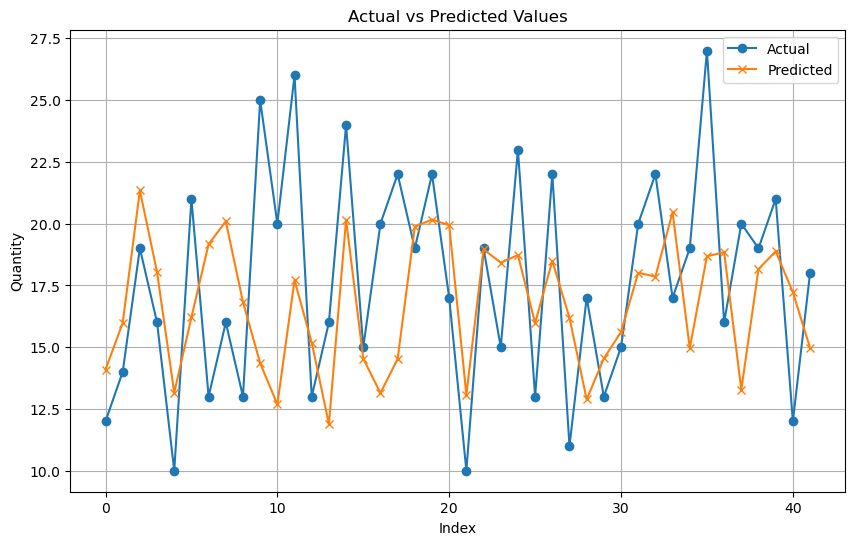

In [11]:
# merge the actual amd predicted values for plotting
import matplotlib.pyplot as plt

# Create a DataFrame to store actual and predicted values
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Display the first few rows of the merged DataFrame
print(results.head())

# Plot Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.plot(results['Actual'], label='Actual', marker='o')
plt.plot(results['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()


## Hyperparameter tuning on  ridge regression
----

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define Ridge regression model
ridge = Ridge()

# Define the parameter grid with integer values for alpha
param_grid = {'alpha': [1, 10, 100, 1000, 10000]}

# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameter and corresponding score
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print(f"Best Alpha: {best_alpha}")
print(f"Best CV Score (Negative MSE): {best_score}")

# Train the model using the best alpha
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = best_ridge.predict(X_test)

# Compute metrics
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mape_ridge = np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100
r2_ridge = r2_score(y_test, y_pred_ridge)
mean_difference_ridge = np.mean(y_test - y_pred_ridge)

# Display metrics
print(f"Ridge Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_ridge:.2f}%")
print(f"R-squared (R²): {r2_ridge:.2f}")
print(f"Mean Difference: {mean_difference_ridge:.2f}")


Best Alpha: 10000
Best CV Score (Negative MSE): -23.422715872058426
Ridge Regression Metrics:
Mean Absolute Error (MAE): 3.78
Root Mean Squared Error (RMSE): 4.44
Mean Absolute Percentage Error (MAPE): 21.68%
R-squared (R²): -0.05
Mean Difference: 0.92


## Evaluating best metrics :-
---

Best Model Metrics:
Mean Absolute Error (MAE): 3.78
Root Mean Squared Error (RMSE): 4.44
Mean Absolute Percentage Error (MAPE): 21.68%
R-squared (R²): -0.05
Mean Difference: 0.92


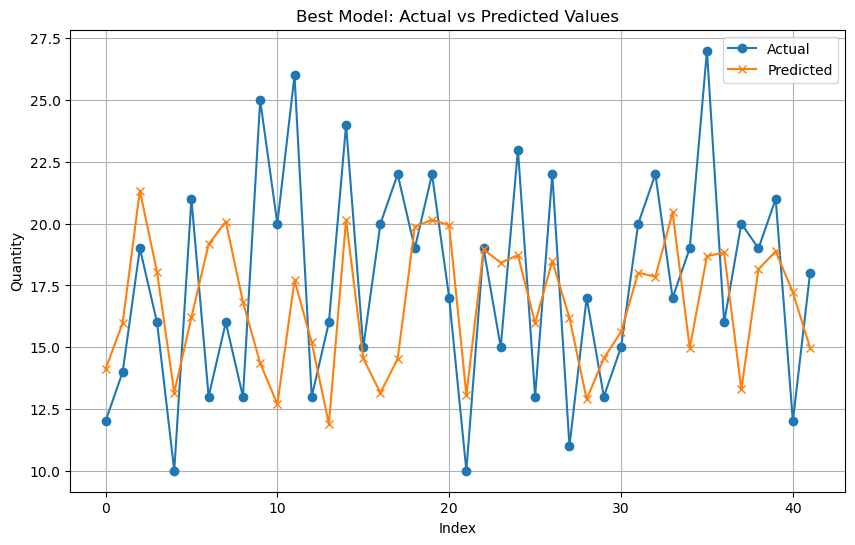

In [23]:
# Evaluate the best model from GridSearchCV
best_ridge = grid_search.best_estimator_  # Retrieve the best model directly
y_pred_best = best_ridge.predict(X_test)  # Predictions using the best model

# Compute evaluation metrics
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mape_best = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100
r2_best = r2_score(y_test, y_pred_best)
mean_difference_best = np.mean(y_test - y_pred_best)

# Display metrics
print(f"Best Model Metrics:")
print(f"Mean Absolute Error (MAE): {mae_best:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_best:.2f}%")
print(f"R-squared (R²): {r2_best:.2f}")
print(f"Mean Difference: {mean_difference_best:.2f}")

# Visualization: Actual vs Predicted
import matplotlib.pyplot as plt

# Create a DataFrame for actual and predicted values
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_best})

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(results['Actual'], label='Actual', marker='o')
plt.plot(results['Predicted'], label='Predicted', marker='x')
plt.title('Best Model: Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()


## Residual plot for hyperparameter tuning using multivariate regression
---

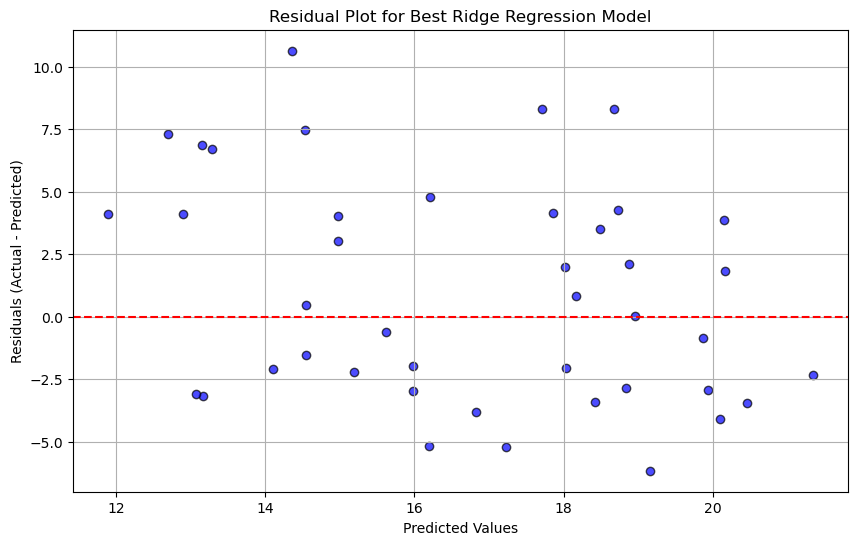

In [25]:
# Calculate residuals
residuals = y_test - y_pred_best

# Create a Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, color='blue', edgecolors='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Line at y=0 for reference
plt.title('Residual Plot for Best Ridge Regression Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()


In [5]:
import pandas as pd

# Load the uploaded dataset
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'
data = pd.read_excel(file_path)
# Preprocess the data: Convert date column and aggregate weekly data
data['Week'] = data['Day Index'].dt.isocalendar().week
data['Year'] = data['Day Index'].dt.year

# Aggregate data by week and year for analysis
weekly_data = data.groupby(['Year', 'Week']).agg({
    'Quantity': 'sum',
    'Google Clicks': 'sum',
    'FB Impressions': 'sum'
}).reset_index()

# Inspect the weekly aggregated data
weekly_data.head()


,Year,Week,Quantity,Google Clicks,FB Impressions
0,2021,48,59,1729,3242
1,2021,49,129,2554,6598
2,2021,50,101,2909,9581
3,2021,51,73,2546,9752
4,2021,52,62,1704,4907


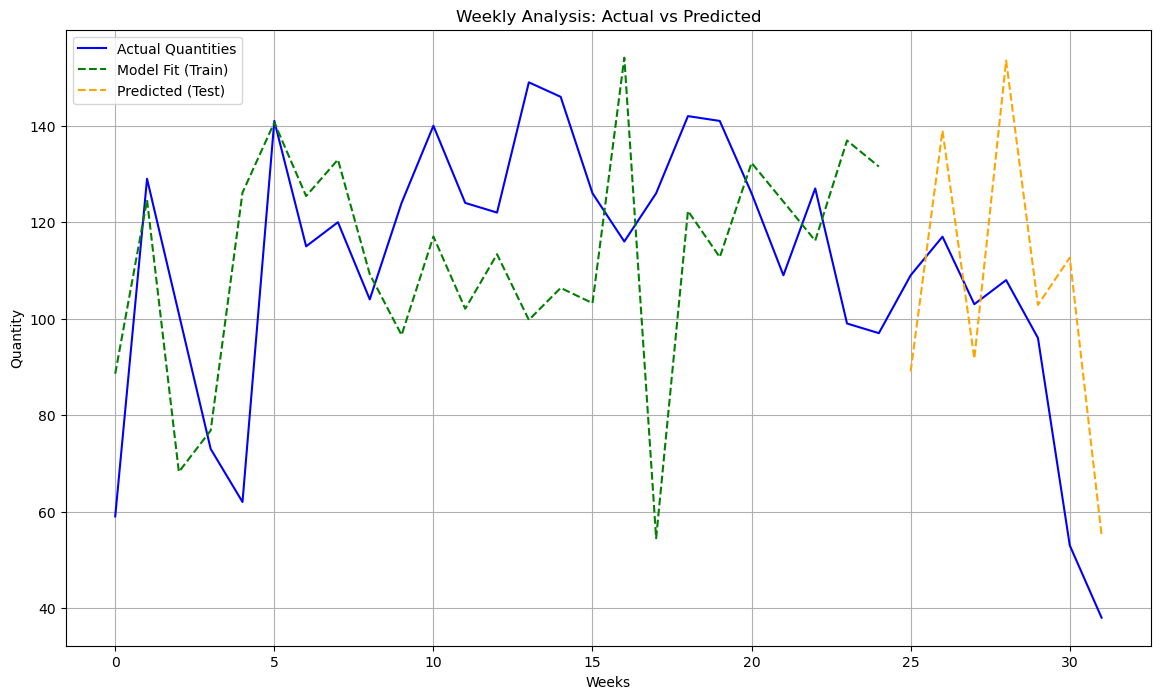

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Prepare features (X) and target (y)
X = weekly_data[['Google Clicks', 'FB Impressions']]
y = weekly_data['Quantity']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Generate predictions for the next 26 weeks (6 months)
future_weeks = 26
future_clicks = np.linspace(X['Google Clicks'].mean(), X['Google Clicks'].mean() * 1.05, future_weeks)
future_impressions = np.linspace(X['FB Impressions'].mean(), X['FB Impressions'].mean() * 1.05, future_weeks)
future_data = pd.DataFrame({
    'Google Clicks': future_clicks,
    'FB Impressions': future_impressions
})

future_predictions = model.predict(future_data)
# Plot 1: Actual vs Predicted Data (Training and Test sets)
plt.figure(figsize=(14, 8))
plt.plot(range(len(y)), y, label="Actual Quantities", color='blue')
plt.plot(range(len(y_train)), model.predict(X_train), label="Model Fit (Train)", linestyle='--', color='green')
plt.plot(range(len(X_train), len(X_train) + len(y_test)), y_pred, label="Predicted (Test)", linestyle='--', color='orange')
plt.xlabel('Weeks')
plt.ylabel('Quantity')
plt.title('Weekly Analysis: Actual vs Predicted')
plt.legend()
plt.grid()
plt.show()

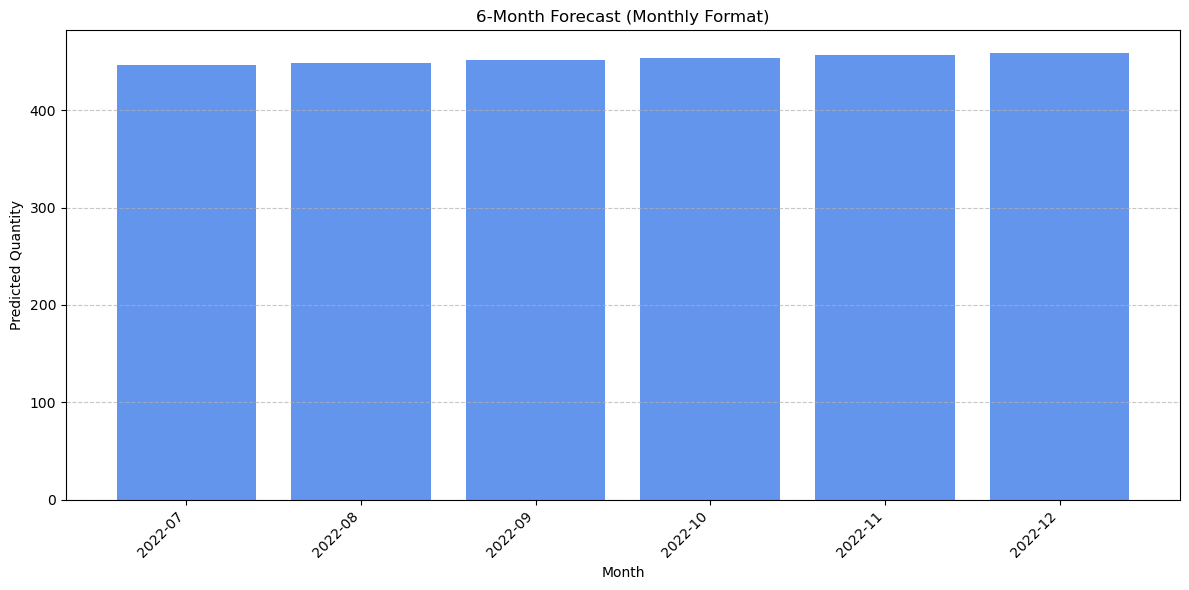

     Month  Predicted Quantity
0  2022-07          445.973685
1  2022-08          448.604287
2  2022-09          451.234889
3  2022-10          453.865491
4  2022-11          456.496093
5  2022-12          459.126695


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate future dates for the weekly forecast
future_dates = pd.date_range(start=data['Day Index'].max(), periods=future_weeks, freq='W')

# Convert weekly dates to months
future_months = future_dates.to_period('M').unique()

# Aggregate predictions into monthly totals
monthly_forecast = pd.DataFrame({
    'Month': future_months,
    'Predicted Quantity': [
        future_predictions[i * 4:(i + 1) * 4].sum() for i in range(len(future_months))
    ]
})

# Plot the monthly forecast as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(monthly_forecast['Month'].astype(str), monthly_forecast['Predicted Quantity'], color='cornflowerblue')
plt.xlabel('Month')
plt.ylabel('Predicted Quantity')
plt.title('6-Month Forecast (Monthly Format)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Optional: Display monthly forecast as a table
print(monthly_forecast)



# Milestone 4
----

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_excel(r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx')

# Preprocess data as weekly aggregates (ensure these columns exist)
X = data[['Google Clicks', 'FB Impressions']]
y = data['Quantity']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Compile metrics into a DataFrame
performance_metrics = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE'],
    'Value': [mae, rmse, mape]
})

# Display the metrics
print(performance_metrics)


  Metric      Value
0    MAE   3.780839
1   RMSE   4.442314
2   MAPE  21.680246


## forecasts for future period:-
----
An ARIMA model was trained on the Quantity time series using (p=1, d=1, q=1) parameters. Differencing was applied to handle non-stationarity, based on the Augmented Dickey-Fuller (ADF) test results. The model forecasted the next 6 months of data.A line plot was generated, displaying historical data alongside ARIMA forecasts. The x-axis was formatted to show calendar months, providing a clear, intuitive representation of time progression and future trends.So,finally we get the forecaasted data for the next six months


C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pm5cd\AppData\Local\Temp\ipykernel_4748\3533534497.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=time_series.index[-1], periods=forec

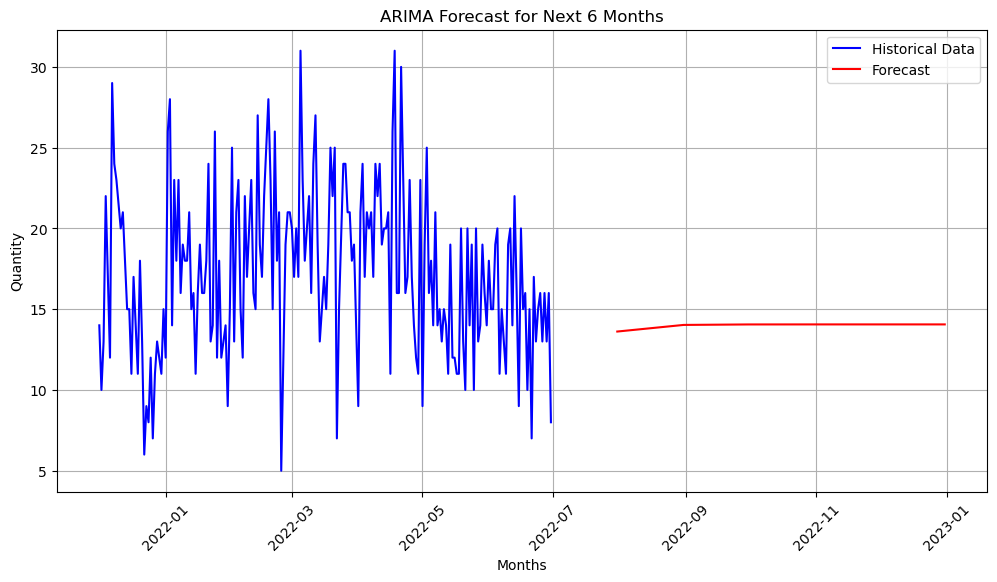

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load dataset
data = pd.read_excel(r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx')

# Ensure the dataset has a proper datetime index
data['Date'] = pd.to_datetime(data['Day Index'])  # Replace 'Day Index' with the correct date column
data.set_index('Date', inplace=True)

# Use the Quantity column as a time series
time_series = data['Quantity']

# Check for stationarity using the ADF test
adf_test = adfuller(time_series)
if adf_test[1] > 0.05:
    time_series_diff = time_series.diff().dropna()  # First-order differencing
else:
    time_series_diff = time_series

# Fit ARIMA model (update p, d, q values based on ACF and PACF)
model = ARIMA(time_series, order=(1, 1, 1))  # Adjust order as needed
fitted_model = model.fit()

# Forecast the next 6 months
forecast_period = 6
forecast_index = pd.date_range(start=time_series.index[-1], periods=forecast_period + 1, freq='M')[1:]
forecast = fitted_model.forecast(steps=forecast_period)

# Plot the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Historical Data', color='blue')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Months')
plt.ylabel('Quantity')
plt.title('ARIMA Forecast for Next 6 Months')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


# CONCLUSION
----

* Here , by using the ARIMA model i have forecasted the next six months data. Here in the above plot we can observe the forecasted  sales plot.

* The red line represents the ARIMA model's forecast for the next six months. This projection is based on historical patterns and trends observed in the input data.The x-axis is formatted to show calendar months, making it easy to interpret the temporal progression of both the historical data and the forecast.The y-axis represents the predicted values of Quantity. The red forecast line allows stakeholders to understand expected changes or trends over the forecast period.

* The forecast highlights potential growth, decline, or stability in Quantity over the next six months, enabling data-driven decision-making and planning. Any sharp increases or decreases in the forecast can signal significant shifts in underlying factors.